텐서플로우에서 기본적으로 제공되는 augmentation함수들이 있습니다. 

이런 augmentation만을 모아서 제공하는 전문 라이브러리들이 있고 

이중에서  imgaug라는 라이브러리를 활용하겠습니다. 


이미지에 augmentation을 적용할 때는 정답(ground truth 또는 gt)이 되는 데이터에도 augmentation이 동일하게 적용 됩니다. 

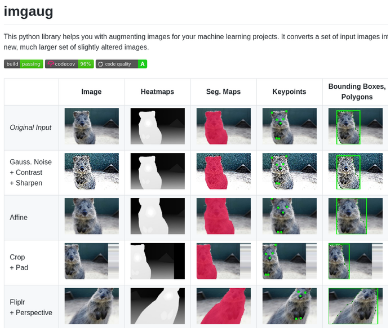

image컬럼은 각 원본 이미지들이고 나머지 col들은 해당 원본 데이터에 대해 각 이미지 테스크에 따른 정답 데이터입니다.

표에서 볼 수 있듯이, 정답 데이터는 원본 데이터의 augmentation에 따라 같이 변화되어야 합니다.  

In [1]:
import numpy as np
import imgaug.augmenters as iaa
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt


# from PIL import Image
import os


sample_img_path = os.getenv('HOME')+'/aiffel/data_augmentation/images/mycat.jpg'
image = Image.open(sample_img_path).resize((500,400))
image_arr = np.array(image)

image_arr = np.array(image)

### augmentation 기법 사용해 보기 

Iaa.Affine()

imgaug.augmenters Affine()은 아핀변환을 이미지에 적용합니다. 
affine변환은 2D변환의 일종입니다. 

affine변환은 이미지의 스케일 수정

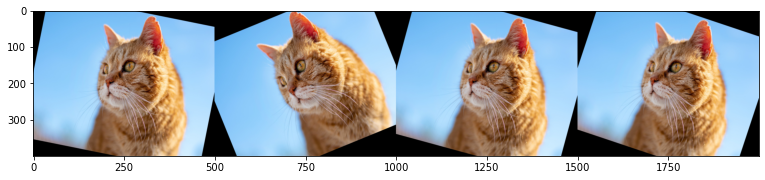

In [2]:
images = [image_arr, image_arr, image_arr, image_arr]
rotate = iaa.Affine(rotate=(-25,25))
images_aug = rotate(images = images)
plt.figure(figsize = (13,13))
plt.imshow(np.hstack(images_aug))

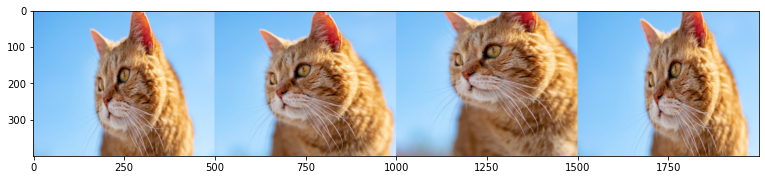

In [3]:
images = [image_arr, image_arr, image_arr, image_arr]
crop = iaa.Crop(percent =(0,0.2))
images_aug = crop(images = images)
plt.figure(figsize = (13,13))
plt.imshow(np.hstack(images_aug))

iaa.Sequential()

여러개의 augmentation기법들을 한 번에 조합하여 사용하는 방법 

imgaug에서 iaa.sequential을 사용해서 여러가지 augmentation기법을 순차적으로 적용 할 수있음

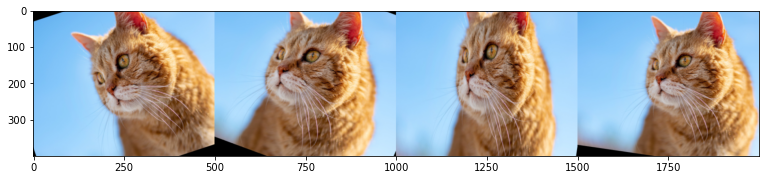

In [4]:
images = [image_arr, image_arr, image_arr, image_arr]
rotate_crop = iaa.Sequential([
    iaa.Affine(rotate = (-25,25)), iaa.Crop(percent = (0,0.2))])
images_aug = rotate_crop(images = images)
plt.figure(figsize = (13,13))
plt.imshow(np.hstack(images_aug))

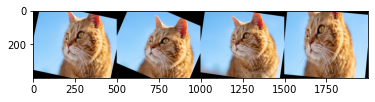

In [5]:
images = [image_arr, image_arr, image_arr, image_arr]
rotate_crop = iaa.Sequential([iaa.Crop(percent = (0,0.2)),iaa. Affine(rotate = (-25,25))],
random_order = True)

images_aug = rotate_crop(images = images)
plt.imshow(np.hstack(images_aug))

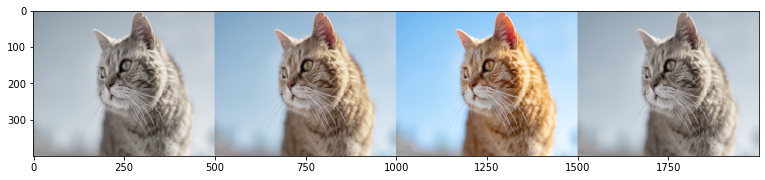

In [6]:
images = [image_arr, image_arr, image_arr, image_arr]
seq = iaa.OneOf([
    iaa.Grayscale(alpha=(0.0,1.0)),
    iaa.AddToSaturation((-50, 50))
])
images_aug = seq(images = images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

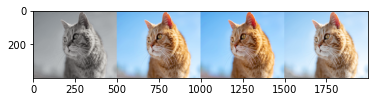

In [7]:
images = [image_arr, image_arr, image_arr, image_arr]
seq = iaa.Sequential([
    iaa.Sometimes(0.6, iaa.AddToSaturation((-50,50))),
    iaa.Sometimes(0.2,iaa.Grayscale(alpha=(0.0, 1.0)))])
images_aug = seq(images = images)
plt.imshow(np.hstack(images_aug))

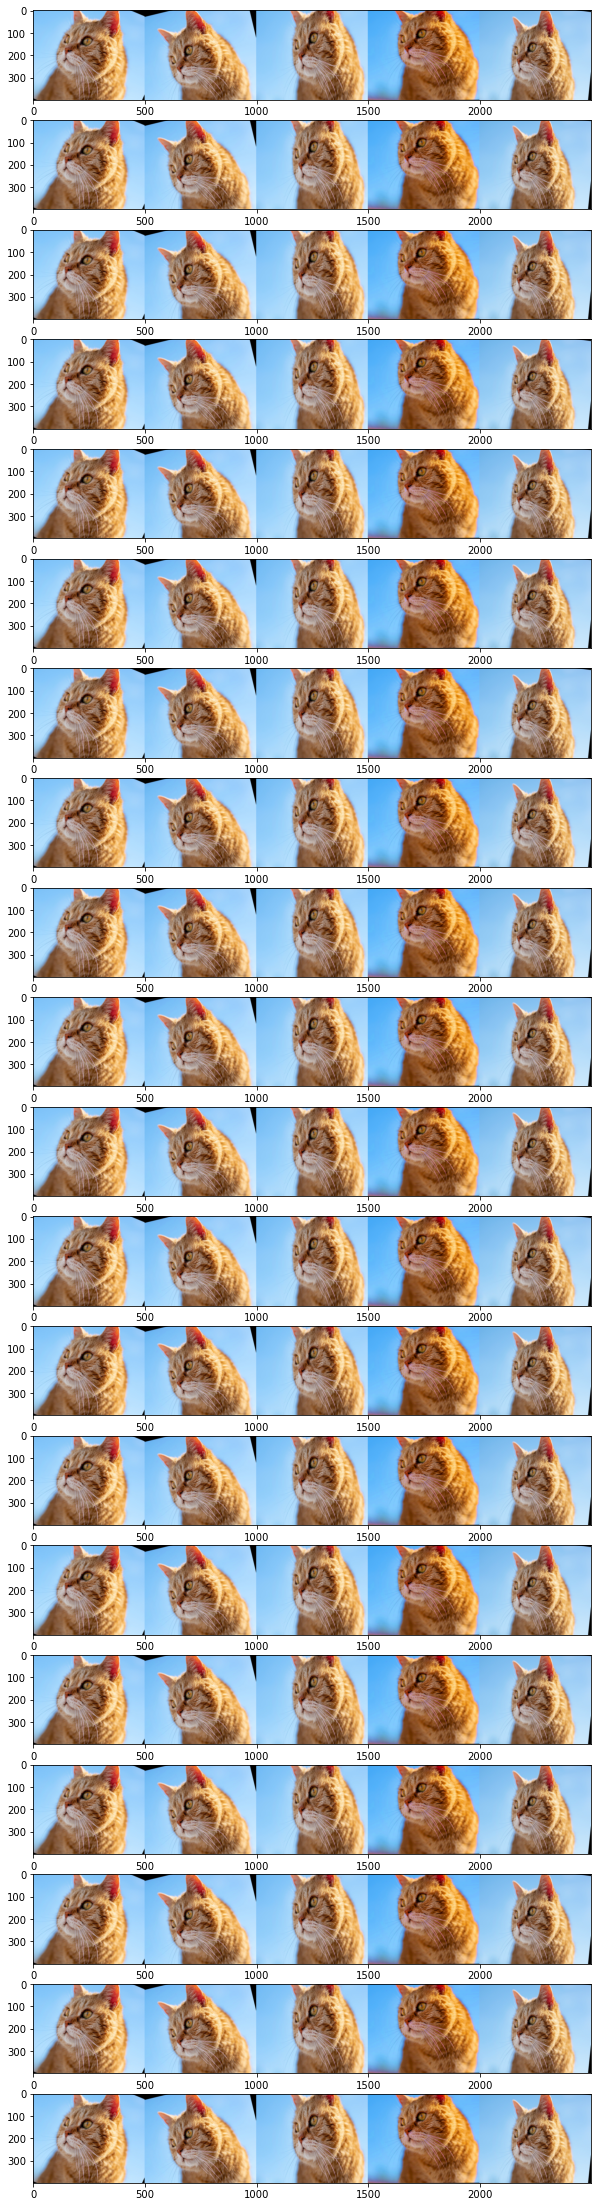

In [17]:
seq = iaa.Sequential([
    iaa.OneOf([iaa.Grayscale(alpha=(0.0, 1.0)), 
    iaa.Sometimes(0.5, iaa.AddToSaturation((-50, 50)))]),
    iaa.Sequential([iaa.Crop(percent = (0, 0.2)), 
    iaa.Affine(rotate = (-25,25)),], random_order = True)])

plt.figure(figsize = (10, 40))

for i in range(20):
    images = [ image_arr, image_arr, image_arr, image_arr]
    image_aug = seq(images = images)
    plt.subplot(20,1,i + 1)
    plt.imshow(np.hstack(images_aug))
# plt.show()

요즘은 augmentation도 알고리즘으로 구현한다고 한다. 

알고리즘은 무겁기 때문에 이런 기법도 알아둬야 할 것 같다. 

그중에 끝판왕 마지막만 잘 기억해도 나을듯하다. 